In [24]:
import sklearn
df=sklearn.datasets.load_iris()


sklearn provides datasets like Iris and diabetes, which we can use for analysis. sklearn also provides different ML tools like linear regression and k-means.

In [25]:
import pandas as pd
data=pd.DataFrame(df.data,columns=df.feature_names)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


pandas helps to store, manipulate and analyse data in tables. These tables are called DataFrames. we first convert the Iris dataset to pandas DataFrame, with rows as samples and columns as features. 

In [26]:
data['species'] = df.target
data['species'] = data['species'].map({0:'setosa', 1:'versicolor', 2:'virginica'})

The dataset have a target column in which the species are marked 0,1,2, we give each species name for better analysis. 

In [27]:
data.shape

(150, 5)

This returns the number of rows and columns of the data.

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


info() gives the column names, data types, and missing values. In this dataset, no null values exists.

In [29]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


This method gives the summary statistics like count, mean, std, min, max and the quartiles.

In [30]:
data.columns.tolist()

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)',
 'species']

Here we have the list of all the column names in our dataset.

In [31]:
data.isnull()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


This method returns true if the value is null. 

In [32]:
data.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

Since no null values exists, the sum of null value interpreted by this method is 0 for all the columns.

In [33]:
data.nunique()

sepal length (cm)    35
sepal width (cm)     23
petal length (cm)    43
petal width (cm)     22
species               3
dtype: int64

This method returns the number of unique values in each column.

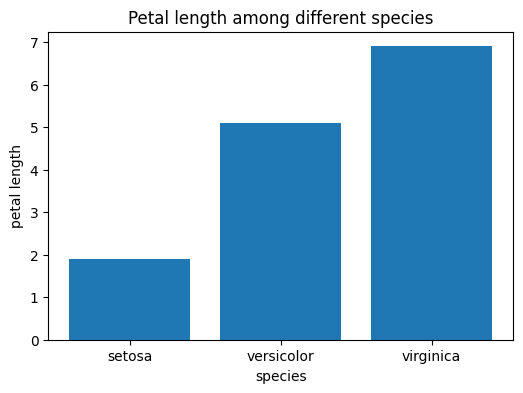

In [34]:
import matplotlib.pyplot as plt
petal_length=data['petal length (cm)']
plt.figure(figsize=(6,4))
plt.bar(data['species'],petal_length)
plt.title('Petal length among different species')
plt.xlabel('species')
plt.ylabel('petal length')
plt.show()

This barplot depicts the relation of petal length among the 3 species. This shows a significant differrnce in petal length between setosa and virginica species.

In [35]:
import seaborn as sns

seaborn helps create easy and attractive statistical visualizations like Heatmap, scatter plot, box plot, pair plot.

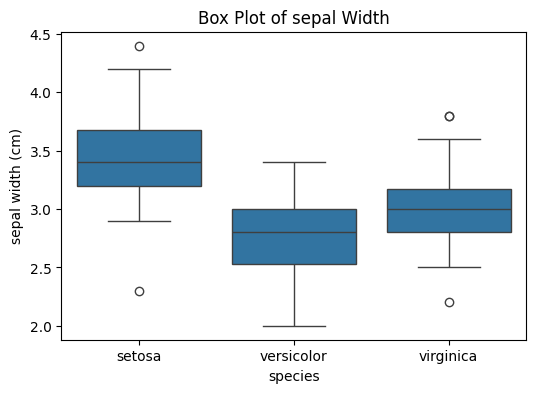

In [36]:
plt.figure(figsize=(6,4))
sns.boxplot(x='species', y='sepal width (cm)', data=data)
plt.title('Box Plot of sepal Width')
plt.show()

boxplot helps in identifyong the median, quartiles, spread and the outliers of the data. Here outliers exists for the species setosa and virginica. setosa is having the highest median sepal width and versicolor, the lowest median sepal width.

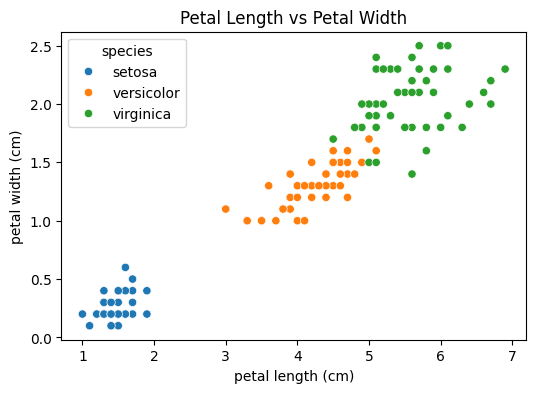

In [37]:
plt.figure(figsize=(6,4))
sns.scatterplot(
    x='petal length (cm)',
    y='petal width (cm)',
    hue='species',
    data=data
)
plt.title('Petal Length vs Petal Width')
plt.show()

scatterplot is useful in understanding the relationship between two numerical variables. Here Setosa is clearly separateed from the other species and versicolor and virginica partially overlap. This graph is important beacause, the other pairs show more overlap rather than forming distinct clusters, so they are less useful for classification.

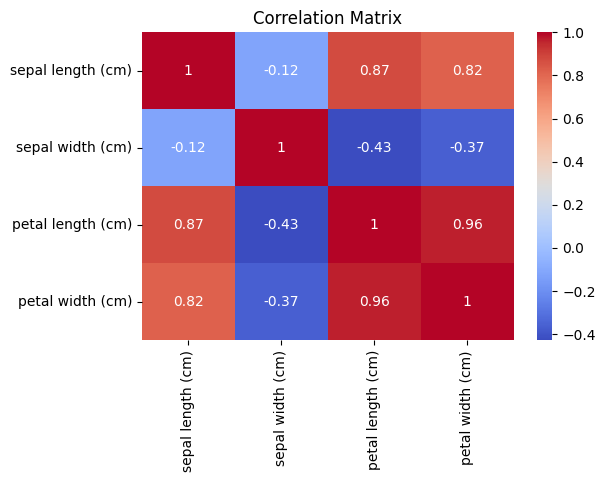

In [38]:

plt.figure(figsize=(6,4))
sns.heatmap(data.iloc[:, :-1].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Heatmap is useful in finding the correlation between all numerical features at once. This shows the measure of how strongly two variables are related. Here, petal length and petal width have a very strong positive correlation while sepal width is negatively correlated with other features. Sepal length is strongly positively correlated with petal features and negatively correlated with the sepal widith.

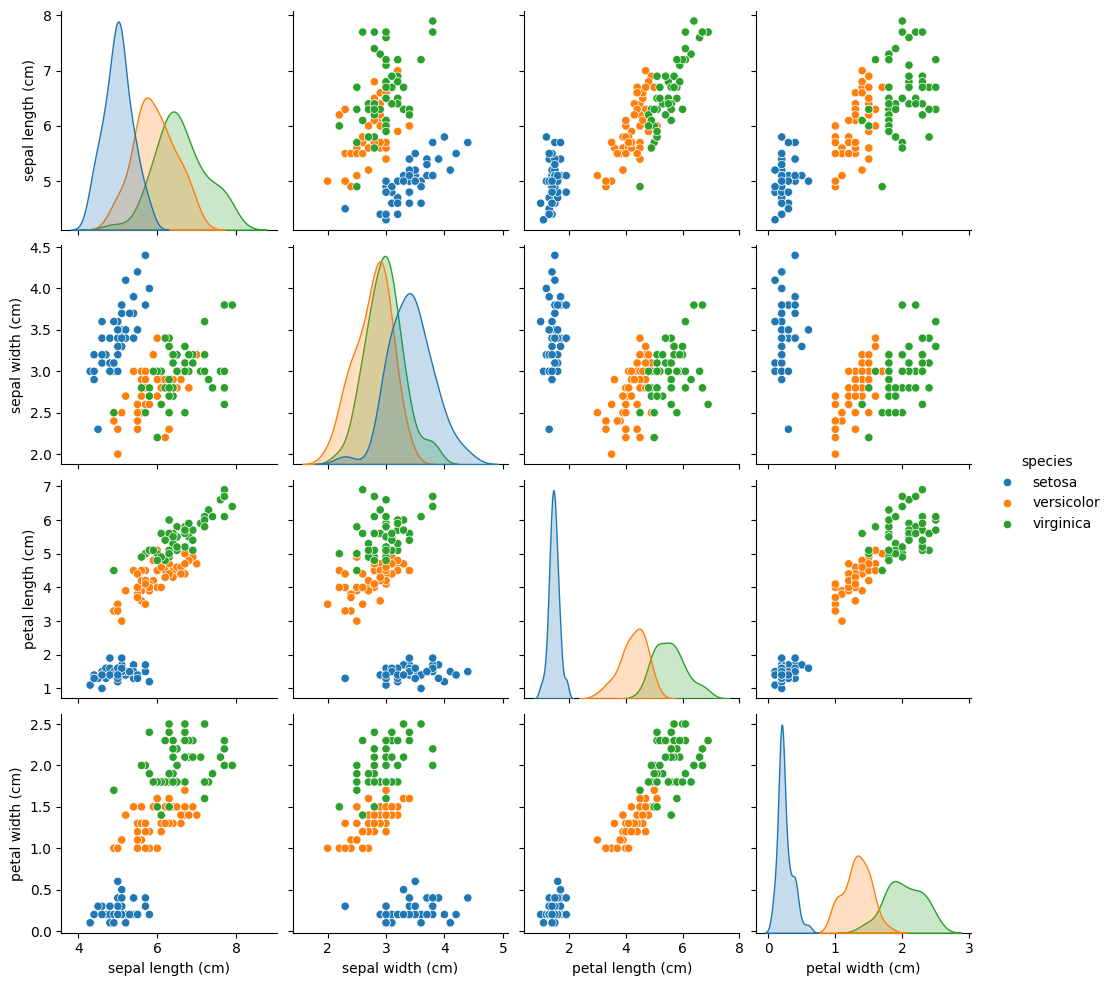

In [39]:
sns.pairplot(data, hue='species')
plt.show()


Using pairplot relationships between all feature pairs can be seen at once. here petal length and petal width give the best class separation, while sepal features show more overlap and are less informative. Among the petal features, setosa is clearly separated from the other species but the others show partial overlap

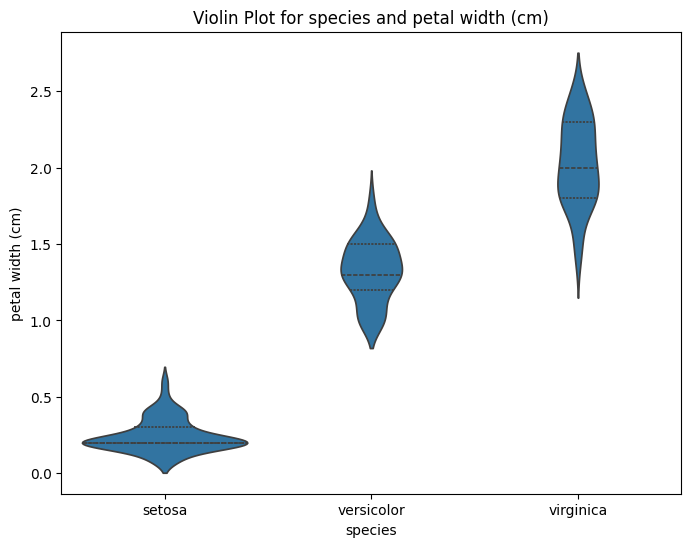

In [40]:
plt.figure(figsize=(8,6))
sns.violinplot(x="species", y="petal width (cm)", data=data, inner='quartile')
plt.title('Violin Plot for species and petal width (cm)')
plt.xlabel('species')
plt.ylabel('petal width (cm)')
plt.show()

violin plot shows the distribution shape and spread for the data. The thick region will be having more data points and the length shows the distribution of the values.The middle line is the median. Other lines the quartiles.